<center><strong><h1>Elective 4</h1></strong></center>
<center><strong><h2>Deep Learning</h2></strong></center>

<div class="alert alert-block alert-success" style="font-family: Times New Roman">
    <h4><strong>Advisor:</strong><italic>Jhun Brian Andam</italic></h4>
    <h4><strong>Student:</strong><italic>Christian Jay Baguio</italic></h4>

<div class="alert alert-block alert-success" style="font-family: Times New Roman">
    <h4><strong>Laboratory Activty</strong></h4>

<p style="font-family:Times New Roman; text-align:justify; font-size:15px">
    <b>Instruction:</b> Convert the following CNN architecture diagram into a PyTorch CNN Architecture.
</p>

<center><img src="quick_draw.png" width="400px"></center>
</div>

# Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms

import random
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

torch.backends.cudnn.deterministic=True
torch.set_printoptions(sci_mode=False)

import time
from tqdm.notebook import tqdm

In [2]:
# `transforms` is used to apply augmentation techniques and modification to the image data (e.g, rotate, resize, normalization, etc.).
# for this one, let's just convert the image arrays to tensor.
transform = transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data  = datasets.MNIST(root='data', train=False, download=True, transform=transform)

In [3]:
# the training data have 60,000 images, let's take a small portion from it for the validation.
# what's the importance of validation data?
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
# unseen images
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
# 50,000 for training and 10,000 for validation
train_set, val_set = torch.utils.data.random_split(train_data, [0.8, 0.2])

In [6]:
# function to set the seed
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)

In [7]:
set_seed(143)

batch_size = 10

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [8]:
set_seed(143)
images, labels = iter(train_loader).__next__()

def display_image(batch):
    batch = batch.detach().numpy()
    fig, axs = plt.subplots(1, len(batch), figsize=(12, 2))
    for i in range(len(batch)):
        axs[i].imshow(batch[i, 0, :, :], vmin=0, vmax=1)
        axs[i].axis('off')
        axs[i].set_title(labels[i].numpy())
    plt.show()

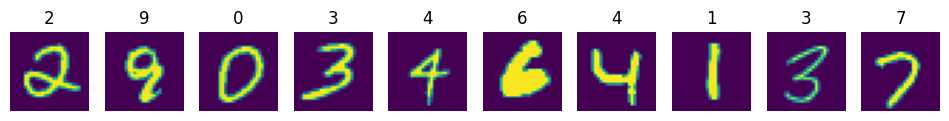

torch.Size([10, 1, 28, 28])


In [9]:
display_image(images)
print(images.shape)

# (b, c, h, w)

$$\text{Output Shape} = \frac{\text{input width} - \text{filter} + 2 \cdot \text{padding}}{\text{stride} + 1}$$

In [10]:
def calc_out(w, f, s, p):
    """
    Calculate output shape of a matrix after a convolution.
    The results are only applicable for square matrix kernels and images only.
    """
    print(f'Output Shape: {(w - f + 2 * p) // s + 1}')

<h4 style="font-family: Times New Roman"><strong>First Convolution Layer + Activation Function</strong></h4>

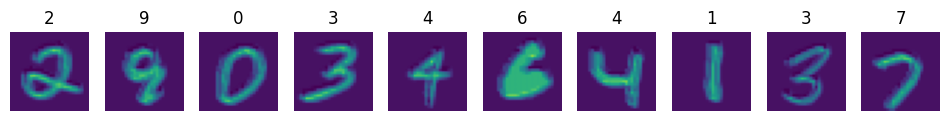

torch.Size([10, 32, 28, 28])


In [11]:
conv1 = nn.Conv2d(1, 32, (3,3), 1, 1)

x = F.relu(conv1(images))
display_image(x)
print(x.shape)

<h4 style="font-family: Times New Roman"><strong>First Pooling (MaxPooling)</strong></h4>

In [12]:
# first maxpooling must output a 14 by 14 size
calc_out(28, 2, 2, 1)

Output Shape: 15


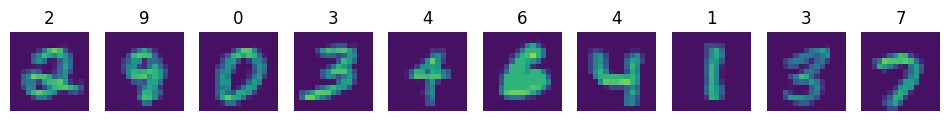

torch.Size([10, 32, 15, 15])


In [13]:
pool1 = nn.MaxPool2d((2,2), 2, 1)

x = pool1(x)
display_image(x)
print(x.shape)

<h4 style="font-family: Times New Roman"><strong>Second Convolution Layer + Activation Function</strong></h4>

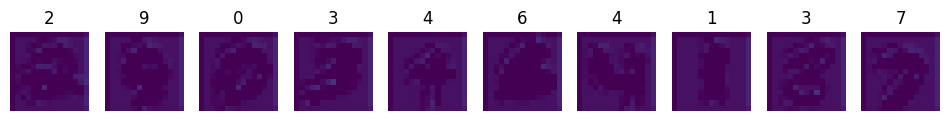

torch.Size([10, 64, 15, 15])


In [14]:
conv2 = nn.Conv2d(32, 64, (3,3), 1, 1)

x = F.relu(conv2(x))
display_image(x)
print(x.shape)

In [15]:
calc_out(15, 3, 1, 1)

Output Shape: 15


<h4 style="font-family: Times New Roman"><strong>Third Convolution Layer + Activation Function</strong></h4>

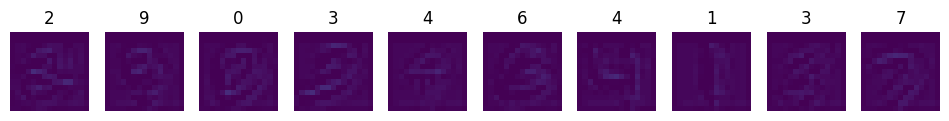

torch.Size([10, 128, 15, 15])


In [16]:
conv3 = nn.Conv2d(64, 128, (3,3), 1, 1)

x = F.relu(conv3(x))
display_image(x)
print(x.shape)

<h4 style="font-family: Times New Roman"><strong>Fourth Convolution Layer + Activation Function</strong></h4>

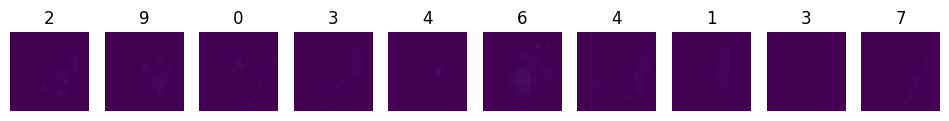

torch.Size([10, 256, 15, 15])


In [17]:
conv4 = nn.Conv2d(128, 256, (3,3), 1, 1)

x = F.relu(conv4(x))
display_image(x)
print(x.shape)

In [18]:
calc_out(15, 3, 1, 1)

Output Shape: 15


<h4 style="font-family: Times New Roman"><strong>Second Pooling (MaxPooling)</strong></h4>

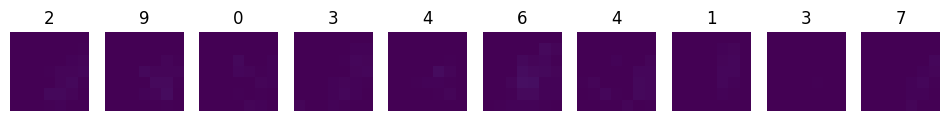

torch.Size([10, 256, 7, 7])


In [19]:
pool2 = nn.MaxPool2d((2,2), 2, 0)

x = pool2(x)
display_image(x)
print(x.shape)

<h4 style="font-family: Times New Roman"><strong>Dropout</strong></h4>

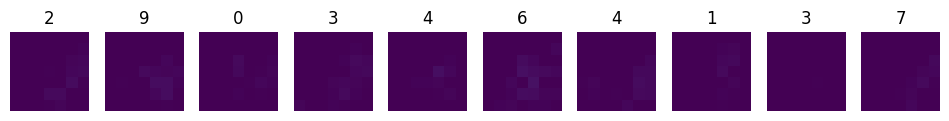

torch.Size([10, 256, 7, 7])


In [20]:
dropout = nn.Dropout(0.2)

x = dropout(x)
display_image(x)
print(x.shape)

In [21]:
idx = 3
feature_maps =  x[idx].view((1, 256, 7, 7)).detach().numpy()
fig, axs = plt.subplots(1, 64, figsize=(12, 2))
for i in range(64):
    axs[i].imshow(feature_maps[0, i, :, :], vmin=0, vmax=1)
    axs[i].axis('off')

<h4 style="font-family: Times New Roman"><strong>Full Convolutional Neural Network Implementation</strong></h4>

In [98]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        # just the initialization
        self.conv1 = nn.Conv2d(1, 32, (3,3), 1, 1)
        self.pool1 = nn.MaxPool2d((2,2), 2, 1) #first pool naay padding
        
        self.conv2 = nn.Conv2d(32, 64, (3,3), 1, 1) 
        self.conv3 = nn.Conv2d(64, 128, (3,3), 1, 1) #same kernel size, stride, og padding sa all convo layer
        self.conv4 = nn.Conv2d(128, 256, (3,3), 1, 1)
        self.pool2 = nn.MaxPool2d((2,2), 2, 0) #while sa second is wla na
        
        self.dropout = nn.Dropout(0.2) #add og 20% dropout to min overfitting
        self.fcn1 = nn.Linear(256 * 7 * 7, 1000) #ang in na features ani is equal to 12544
        self.fcn2 = nn.Linear(1000, 500)
        self.fcn3 = nn.Linear(500, 10)

    def forward(self, x):
        # seuential
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool2(x)
        x = self.dropout(x)
        x = torch.flatten(x, 1) #instead of using atong view nag gamit nalang kog torch func na flatten
        x = x.view(-1, 256*7*7)
        x = F.relu(self.fcn1(x))
        x = F.relu(self.fcn2(x))
        x = F.softmax(self.fcn3(x), dim=1)
        
        return x

In [99]:
model = CNN()
model

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (fcn1): Linear(in_features=12544, out_features=1000, bias=True)
  (fcn2): Linear(in_features=1000, out_features=500, bias=True)
  (fcn3): Linear(in_features=500, out_features=10, bias=True)
)

In [100]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

count_parameters(model)

   288
    32
 18432
    64
 73728
   128
294912
   256
12544000
  1000
500000
   500
  5000
    10
______
13438350
